<a href="https://colab.research.google.com/github/pouyyan/ML_Course_2024/blob/main/Mini%20Project%203/Mini_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report
import imageio.v2 as iio
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from itertools import combinations
from cvxopt import matrix, solvers
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint

## Question 1 Part 1

In [ ]:
iris = load_iris()
Data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
Target = pd.DataFrame(data = iris.target, columns=['target'])
Target['species'] = iris.target_names[iris.target]
iris = pd.concat([Data, Target['species']], axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
print("Number of samples:", iris.shape[0])

Number of samples: 150


In [ ]:
print("Shape:", iris.shape)

Shape: (150, 5)


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 800x800 with 0 Axes>

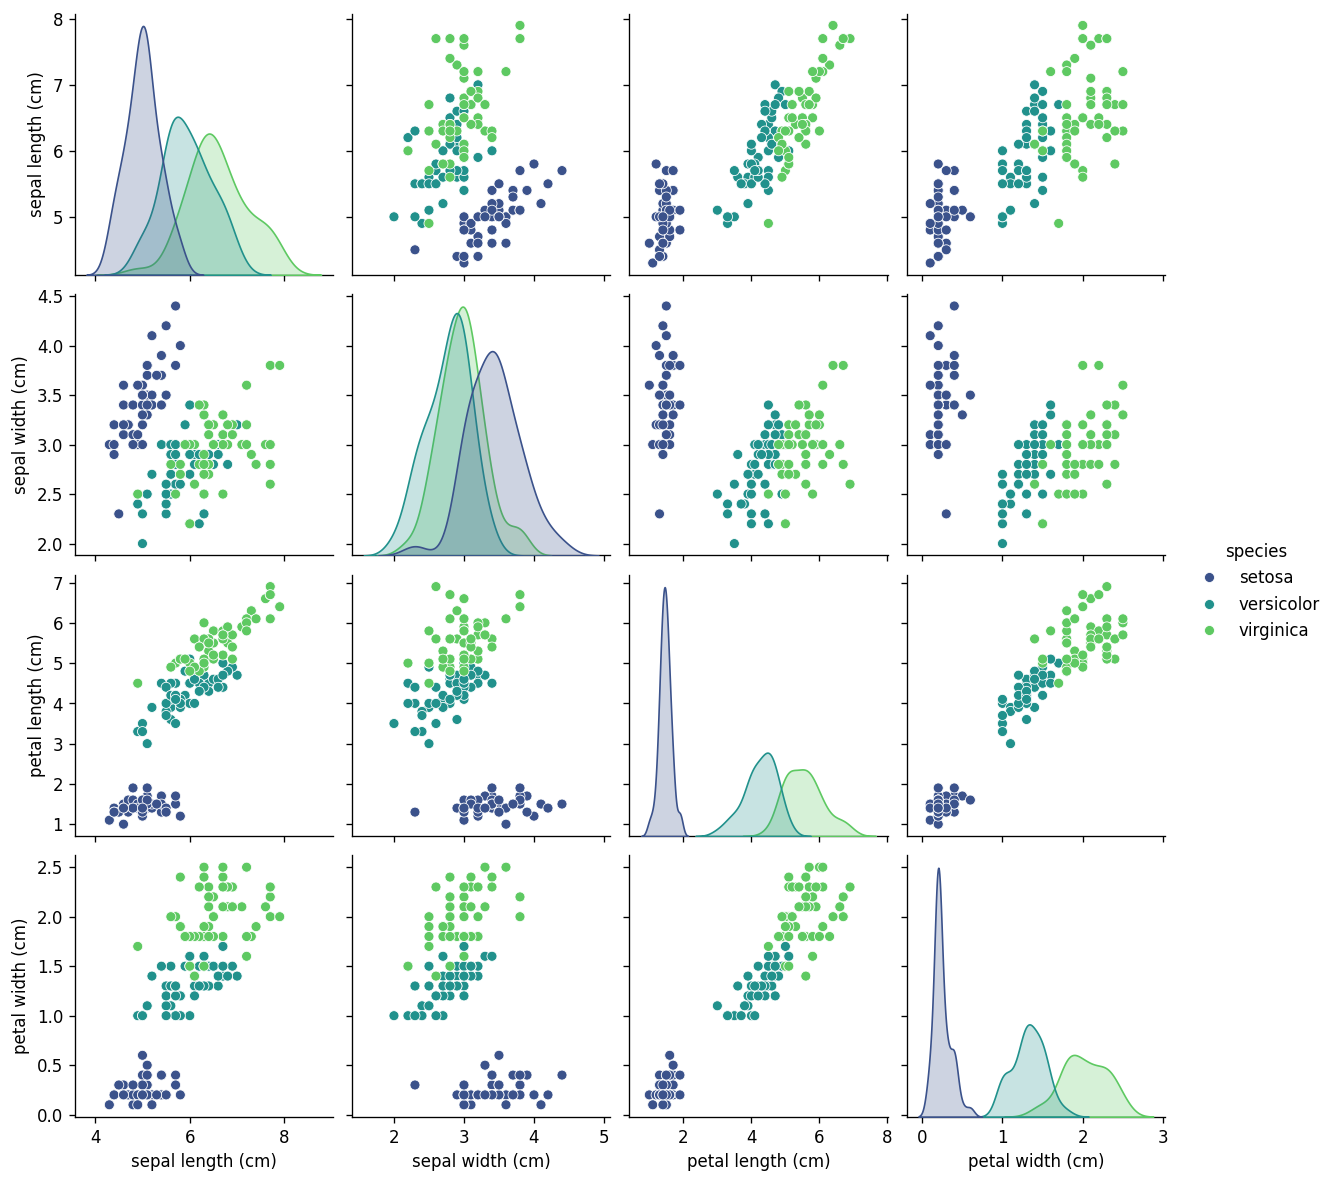

In [ ]:
plt.figure(figsize = (8,8))
plt.rcParams['figure.dpi'] = 120
sns.pairplot(iris, palette = "viridis", hue='species')

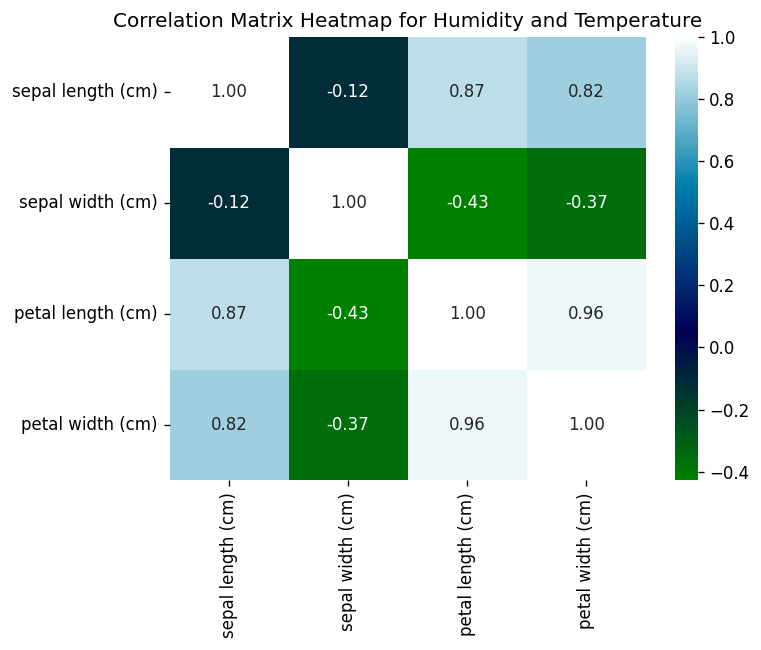

In [ ]:
plt.figure()
sns.heatmap(Data.corr(), annot=True, cmap = "ocean", fmt=".2f")
plt.title("Correlation Matrix Heatmap for Humidity and Temperature")
plt.show()

<ipython-input-9-8b80a2eb8910>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data = Target, palette="viridis")


<Axes: xlabel='species', ylabel='count'>

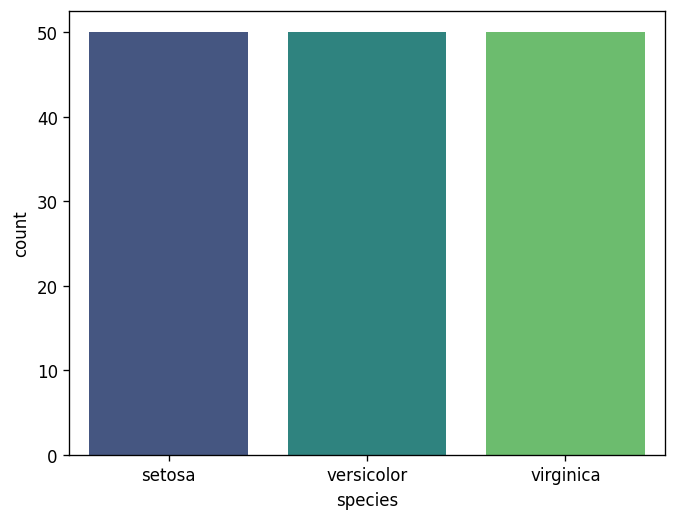

In [ ]:
sns.countplot(x="species", data = Target, palette="viridis")

Text(0.5, 1.0, 't-SNE Visualization of Iris Dataset')

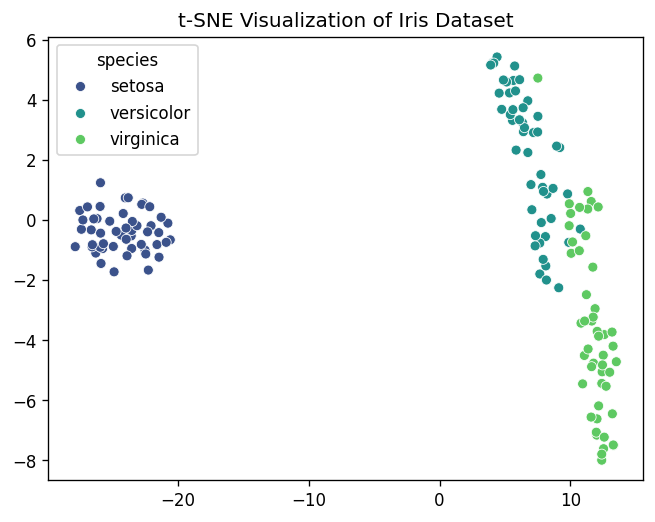

In [ ]:
tsne = TSNE(n_components=2, random_state=6)
X_tsne = tsne.fit_transform(Data)

sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue = Target['species'], palette = 'viridis')
plt.title('t-SNE Visualization of Iris Dataset')

## Question 1 Part 2

Train Test Split

In [ ]:
Data_train, Data_test, target_train, target_test = train_test_split(Data, Target['target'], test_size = 0.3, random_state = 6)
Data_train.shape, Data_test.shape, target_train.shape, target_test.shape

((105, 4), (45, 4), (105,), (45,))

Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(Data_train)

Data_train_S = scaler.transform(Data_train)
Data_test_S = scaler.transform(Data_test)

print('Mean of Stadardized Train data: ',np.mean(Data_train_S), '\n', 'STD Stadardized Train data: ',np.std(Data_train_S),'\n')
print('Mean Stadardized Test data: ',np.mean(Data_test_S), '\n', 'STD Stadardized Test data: ', np.std(Data_test_S))

Mean of Stadardized Train data:  1.4380031557049647e-16 
 STD Stadardized Train data:  1.0 

Mean Stadardized Test data:  -0.09984497111589581 
 STD Stadardized Test data:  0.9505893482596744


### LDA Method

Text(0.5, 1.0, 'LDA Visualization of Iris Dataset')

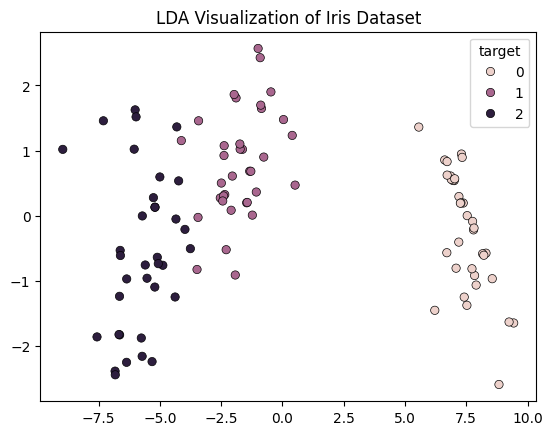

In [ ]:
lda = LDA(n_components = 2)
lda.fit(Data_train_S, target_train)
Data_train_lda = lda.transform(Data_train_S)
Data_test_lda = lda.transform(Data_test_S)
Data_train_lda.shape, Data_test_lda.shape

plt.figure()
sns.scatterplot(x = Data_train_lda[:,0], y = Data_train_lda[:,1], hue = target_train, edgecolor = 'k')
plt.title('LDA Visualization of Iris Dataset')

### Linear SVM

In [ ]:
SVC_L = SVC(kernel = 'linear', random_state = 6)
SVC_L.fit(Data_train_lda, target_train)
target_SVC_L_pred = SVC_L.predict(Data_test_lda)
SVC_L.score(Data_test_lda, target_test)

0.9777777777777777

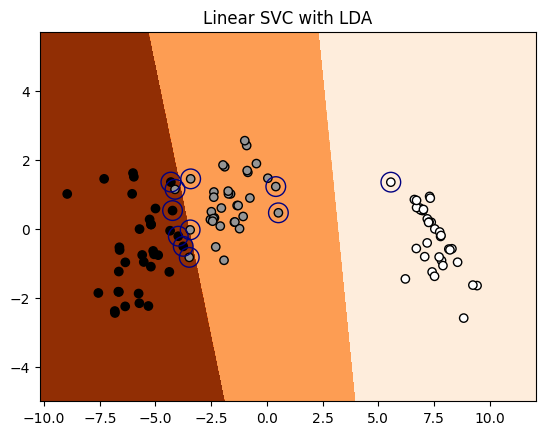

In [ ]:
plt.figure()
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(SVC_L, Data_test_lda, response_method = 'predict', ax = ax, plot_method = 'contourf', cmap = 'Oranges', grid_resolution = 2000, eps=3)

plt.scatter(x = Data_train_lda[:, 0], y = Data_train_lda[:, 1], c = target_train, cmap = 'Greys', edgecolors='k')
ax.scatter(SVC_L.support_vectors_[:, 0], SVC_L.support_vectors_[:, 1], s = 200, facecolors="none", edgecolors="navy")

plt.title('Linear SVC with LDA')
plt.show()

Confusion Matrix

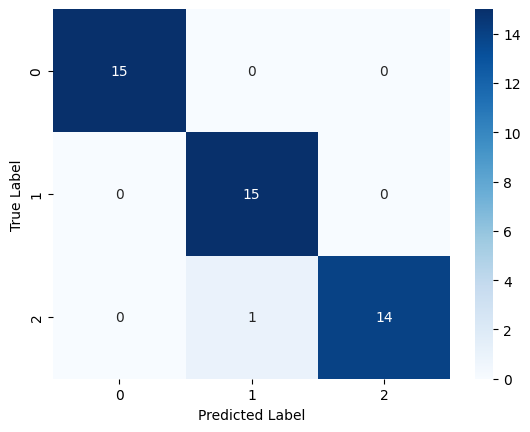

In [ ]:
Confusion_Matrix = confusion_matrix(target_test, target_SVC_L_pred)

sns.heatmap(Confusion_Matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Question 1 Part 3

In [ ]:
images = []
for i in range(1,11):
  SVC_P_lda = SVC(kernel = 'poly', degree = i, C = 0.5, random_state = 6)
  SVC_P_lda.fit(Data_train_lda, target_train)
  target_SVC_P_pred = SVC_P_lda.predict(Data_test_lda)

  # Print accuracy and f1-score
  print(f'Degree = {i}')
  print(f'accuracy = {accuracy_score(target_test,  target_SVC_P_pred)* 100:.2f}')
  print(f'f1-score = {f1_score(target_test,  target_SVC_P_pred, average="macro"):.2f}')
  print('-----------------------------------')
  # Plot decision boundary
  fig, ax = plt.figure() , plt.gca()

  DecisionBoundaryDisplay.from_estimator(SVC_P_lda, Data_test_lda, response_method="auto", grid_resolution=2000, cmap='Oranges', ax=ax, eps=3)
  plt.scatter(x = Data_train_lda[:, 0], y = Data_train_lda[:, 1], c = target_train, cmap = 'Greys', edgecolors='k')
  ax.scatter(SVC_P_lda.support_vectors_[:, 0], SVC_P_lda.support_vectors_[:, 1], s = 200, facecolors="none", edgecolors="navy")

  plt.title(f'SVC for polynomial with degree = {i}')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')

  plt.savefig(f'SVM_Polynomial_degree = {i}.png')
  images.append(iio.imread((f'SVM_Polynomial_degree = {i}.png')))
  plt.close('all')


iio.mimsave('SVM_Decision_Boundary.gif', images, duration = 1000, loop = 0)


Degree = 1
accuracy = 97.78
f1-score = 0.98
-----------------------------------
Degree = 2
accuracy = 88.89
f1-score = 0.89
-----------------------------------
Degree = 3
accuracy = 95.56
f1-score = 0.96
-----------------------------------
Degree = 4
accuracy = 82.22
f1-score = 0.81
-----------------------------------
Degree = 5
accuracy = 86.67
f1-score = 0.86
-----------------------------------
Degree = 6
accuracy = 77.78
f1-score = 0.75
-----------------------------------
Degree = 7
accuracy = 82.22
f1-score = 0.81
-----------------------------------
Degree = 8
accuracy = 73.33
f1-score = 0.69
-----------------------------------
Degree = 9
accuracy = 80.00
f1-score = 0.78
-----------------------------------
Degree = 10
accuracy = 68.89
f1-score = 0.65
-----------------------------------


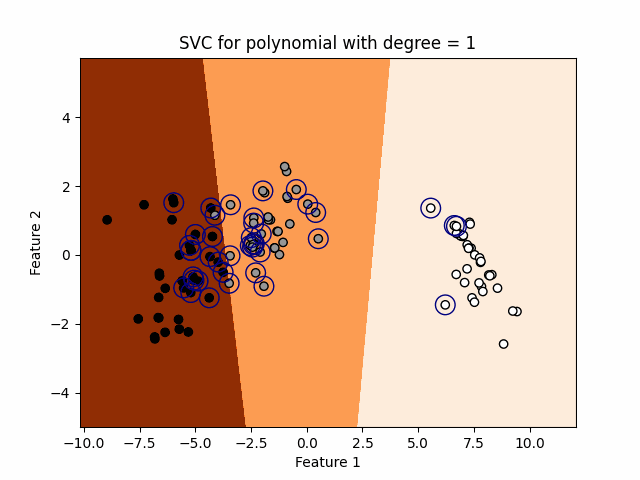

In [ ]:
from IPython.display import Image
Image(filename='SVM_Decision_Boundary.gif')

## Question 1 Part 4

In [2]:
# Load iris dataset
Iris = load_iris()
data = Iris.data
target = Iris.target

# Perform LDA to reduce to 2 components
lda = LDA(n_components=2)
data_lda = lda.fit_transform(data, target)

# Split the dataset
data_train, data_test, target_train, target_test = train_test_split(data_lda, target, test_size = 0.3, random_state = 6)

# Standardize features
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [15]:
class MySVM:
    def __init__(self, degree=3, regularization=None):
        self.degree_of_kernel = degree
        self.regularization_param = regularization
        self.models_storage = []
        self.unique_classes = []

    def polynomial_kernel(self, X, Y=None):
        if Y is None:
            Y = X
        return (1 + np.dot(X, Y.T)) ** self.degree_of_kernel

    def fit(self, X_data, y_data):
        self.unique_classes = np.unique(y_data)
        num_samples, num_features = X_data.shape

        for (class_i, class_j) in combinations(self.unique_classes, 2):
            mask = (y_data == class_i) | (y_data == class_j)
            X_subset = X_data[mask]
            y_subset = y_data[mask]
            y_subset = np.where(y_subset == class_i, 1, -1)

            K_matrix = self.polynomial_kernel(X_subset)
            P = matrix(np.outer(y_subset, y_subset) * K_matrix + np.eye(len(y_subset)) * 1e-2)  # Regularization
            q = matrix(-np.ones(len(y_subset)))
            A = matrix(y_subset, (1, len(y_subset)), 'd')
            b = matrix(0.0)

            if self.regularization_param is None:
                G = matrix(-np.eye(len(y_subset)))
                h = matrix(np.zeros(len(y_subset)))
            else:
                G = matrix(np.vstack((-np.eye(len(y_subset)), np.eye(len(y_subset)))))
                h = matrix(np.hstack((np.zeros(len(y_subset)), np.ones(len(y_subset)) * self.regularization_param)))

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)
            alpha_values = np.ravel(sol['x'])

            support_vectors = alpha_values > 1e-5
            if np.sum(support_vectors) == 0:
                print(f"Warning: No support vectors found for class pair ({class_i}, {class_j}). Skipping.")
                continue

            indices = np.arange(len(alpha_values))[support_vectors]
            alpha_values = alpha_values[support_vectors]
            sv_X_data = X_subset[support_vectors]
            sv_y_data = y_subset[support_vectors]

            b_value = 0
            for idx in range(len(alpha_values)):
                b_value += sv_y_data[idx]
                b_value -= np.sum(alpha_values * sv_y_data * K_matrix[indices[idx], support_vectors])
            b_value /= len(alpha_values)

            self.models_storage.append((alpha_values, sv_X_data, sv_y_data, b_value))

    def project(self, X_data):
        predicted_values = np.zeros((X_data.shape[0], len(self.models_storage)))
        for idx, (alpha_values, sv_data, sv_y, b_value) in enumerate(self.models_storage):
            predicted_values[:, idx] = np.sum(alpha_values * sv_y * self.polynomial_kernel(X_data, sv_data), axis=1) + b_value
        return predicted_values

    def predict(self, X_data):
        predicted_values = self.project(X_data)
        votes_array = np.zeros((X_data.shape[0], len(self.unique_classes)))
        counter = 0
        for idx_i, idx_j in combinations(range(len(self.unique_classes)), 2):
            votes_array[:, idx_i] += (predicted_values[:, counter] > 0).astype(int)
            votes_array[:, idx_j] += (predicted_values[:, counter] < 0).astype(int)
            counter += 1
        return self.unique_classes[np.argmax(votes_array, axis=1)]

    def plot_decision_boundary(self, X_data, y_data):
        min_value_x, max_value_x = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
        min_value_y, max_value_y = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
        xx_vals, yy_vals = np.meshgrid(np.arange(min_value_x, max_value_x, 0.02),
                             np.arange(min_value_y, max_value_y, 0.02))
        Z_data = self.predict(np.c_[xx_vals.ravel(), yy_vals.ravel()])
        Z_data = Z_data.reshape(xx_vals.shape)

        figure = plt.figure()
        plt.contourf(xx_vals, yy_vals, Z_data, alpha=0.8, cmap='Oranges',)
        plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, edgecolors='k', marker='o')
        plt.title(f"SVM_Polynomial_degree = {self.degree_of_kernel}.png")
        return figure


In [16]:
images = []

for i in range(1,11):
  # Define the model
  clf = MySVM(degree=i)
  clf.fit(data_train, target_train)
  target_pred = clf.predict(data_test)

  print(f'Degree = {i}')
  print(f'accuracy = {accuracy_score(target_test,  target_pred)}')
  print(f'f1-score = {f1_score(target_test,  target_pred, average="macro")}')
  print('-----------------------------------------')
  clf.plot_decision_boundary(data_train, target_train)
  plt.savefig(f'SVM_Polynomial_degree = {i}.png')
  images.append(iio.imread((f'SVM_Polynomial_degree = {i}.png')))
  plt.close('all')

iio.mimsave('SVM_Scratch_decision_boundries.gif', images, duration=1000, loop=0)


Degree = 1
accuracy = 0.9777777777777777
f1-score = 0.9777530589543938
-----------------------------------------
Degree = 2
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-----------------------------------------
Degree = 3
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-----------------------------------------
Degree = 4
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-----------------------------------------
Degree = 5
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-----------------------------------------
Degree = 6
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-----------------------------------------
Degree = 7
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-----------------------------------------
Degree = 8
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-----------------------------------------
Degree = 9
accuracy = 0.9333333333333333
f1-score = 0.9326599326599326
-------------------------

# Question 3

In [6]:
!pip install opendatasets
!pip install pandas
!pip install --upgrade --no-cache-dir gdown
!gdown 1S6Ymrd6XLJ73nABqSfAk55KlhzR41mfx

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [7]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download")

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 106MB/s] 


In [8]:
Fraud_df = pd.read_csv('/content/creditcardfraud/creditcard.csv')
Fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
Fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
print('Min before scaling:',Fraud_df['Amount'].min())
print('Max before scaling:',Fraud_df['Amount'].max())

def Scaling(df, Column_name):
  df[Column_name] = (df[Column_name] - df[Column_name].min()) / (df[Column_name].max() - df[Column_name].min())
  return df

Fraud_df_S = Scaling(Fraud_df, 'Amount')
print('Min before scaling:',Fraud_df_S['Amount'].min())
print('Max before scaling:',Fraud_df_S['Amount'].max())

Min before scaling: 0.0
Max before scaling: 25691.16
Min before scaling: 0.0
Max before scaling: 1.0


In [10]:
os.environ['PYTHONHASHSEED'] = str(6)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(6)

In [11]:
Data_F = Fraud_df_S.iloc[:,1:-1]
Target_F = Fraud_df_S['Class']

X_train, X_vt, y_train, y_vt= train_test_split(Data_F.values, Target_F.values, test_size = 0.3, random_state = 6)
X_test, X_valid, y_test, y_valid = train_test_split(X_vt, y_vt, test_size = 0.5, random_state = 6)

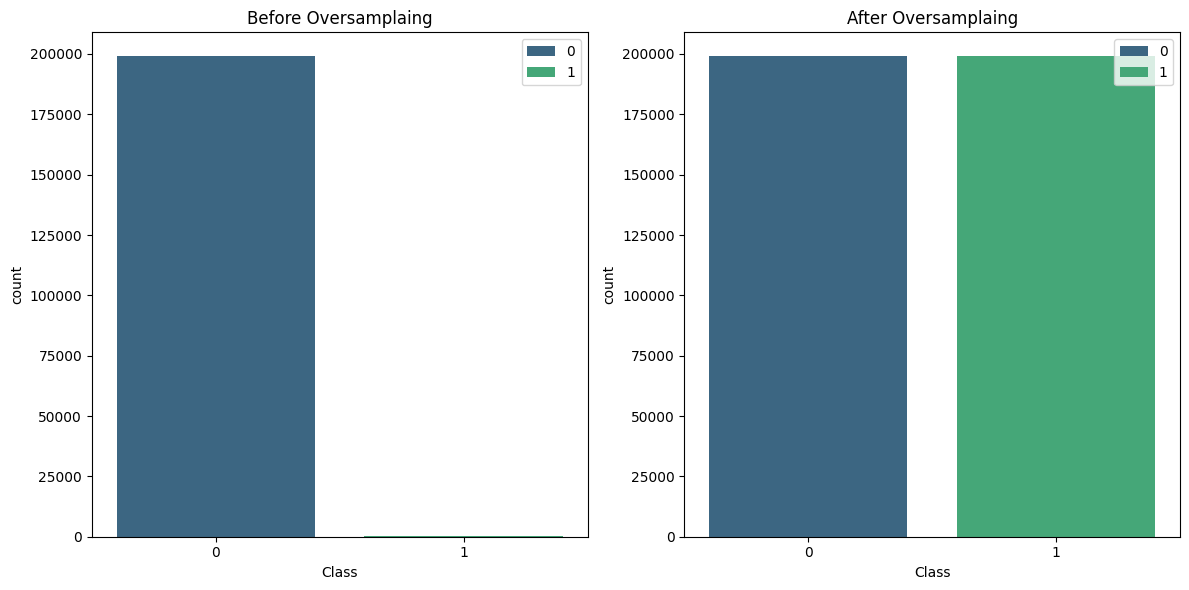

In [12]:
sm = SMOTE(sampling_strategy = 'minority', random_state = 6)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

a = pd.Series(y_train, name='Class')
b = pd.Series(y_train_sm, name='Class')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x = a, ax = axes[0], palette='viridis', hue = y_train)
axes[0].set_title("Before Oversamplaing")
axes[0].legend()


sns.countplot(x = b, ax = axes[1], palette='viridis', hue = y_train_sm)
axes[1].set_title("After Oversamplaing")
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
Noise_factor = 0.4
X_train_noisy = X_train_sm + Noise_factor*np.random.normal(loc=0.0, scale=1.0, size = X_train_sm.shape)

In [ ]:
tf.random.set_seed(6)
random.seed(6)

Denoised_model = Sequential()
Denoised_model.add(Dense(22, activation='relu', input_shape=(29,)))
Denoised_model.add(Dense(15, activation='relu'))
Denoised_model.add(Dense(10, activation='relu'))
Denoised_model.add(Dense(15, activation='relu'))
Denoised_model.add(Dense(22, activation='relu'))
Denoised_model.add(Dense(29, activation='leaky_relu'))

Denoised_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Denoised_model_CP = ModelCheckpoint('Best_Noisy_Loss.keras', monitor='val_loss', save_best_only=True, mode='min')

N_History = Denoised_model.fit(X_train_noisy, X_train_sm, validation_data = (X_valid, X_valid), epochs=10, batch_size=64, callbacks = [Denoised_model_CP])
Denoised_model.load_weights('Best_Noisy_Loss.keras')

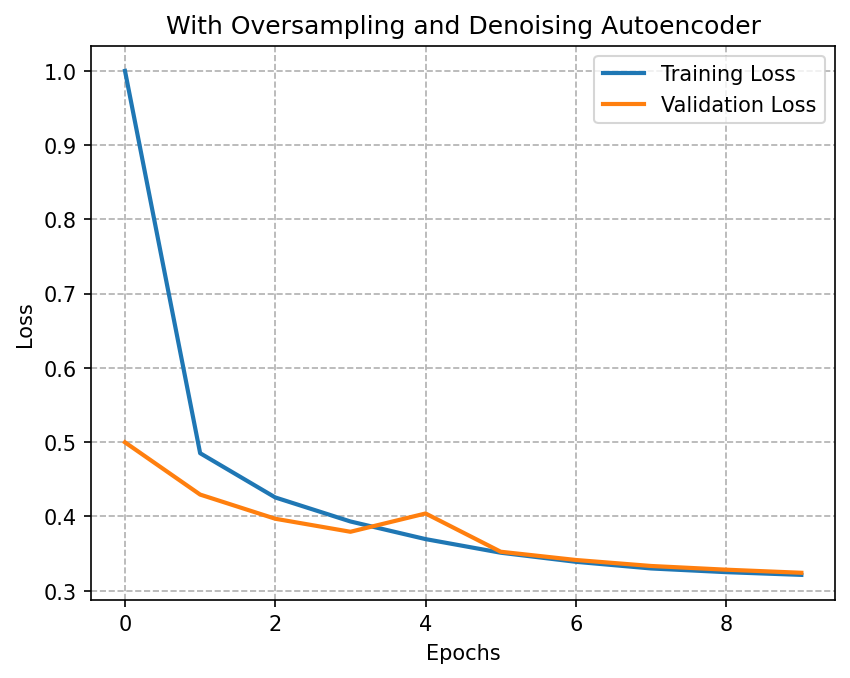

In [ ]:
plt.rcParams['figure.dpi'] = 150
plt.plot(N_History.history['loss'], linewidth=2)
plt.plot(N_History.history['val_loss'], linewidth=2)

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('With Oversampling and Denoising Autoencoder')
plt.grid(True, linestyle = '--')
plt.show()

In [ ]:
X_train_denoised = Denoised_model.predict(X_train_noisy)
X_valid_denoised = Denoised_model.predict(X_valid)

Classfier = Sequential()
Classfier.add(Dense(22, activation='relu', input_shape=(29,)))
Classfier.add(Dense(15, activation='relu'))
Classfier.add(Dense(10, activation='relu'))
Classfier.add(Dense(5, activation='relu'))
Classfier.add(Dense(2, activation='sigmoid'))

Classfier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Classfier_CP = ModelCheckpoint('best_Classfier_Loss.keras', monitor='val_loss', save_best_only=True, mode='min')

Classifier_History = Classfier.fit(X_train_denoised, y_train_sm, validation_data = (X_valid_denoised, y_valid), epochs=10, batch_size=64, callbacks=[Classfier_CP])
Classfier.load_weights('best_Classfier_Loss.keras')

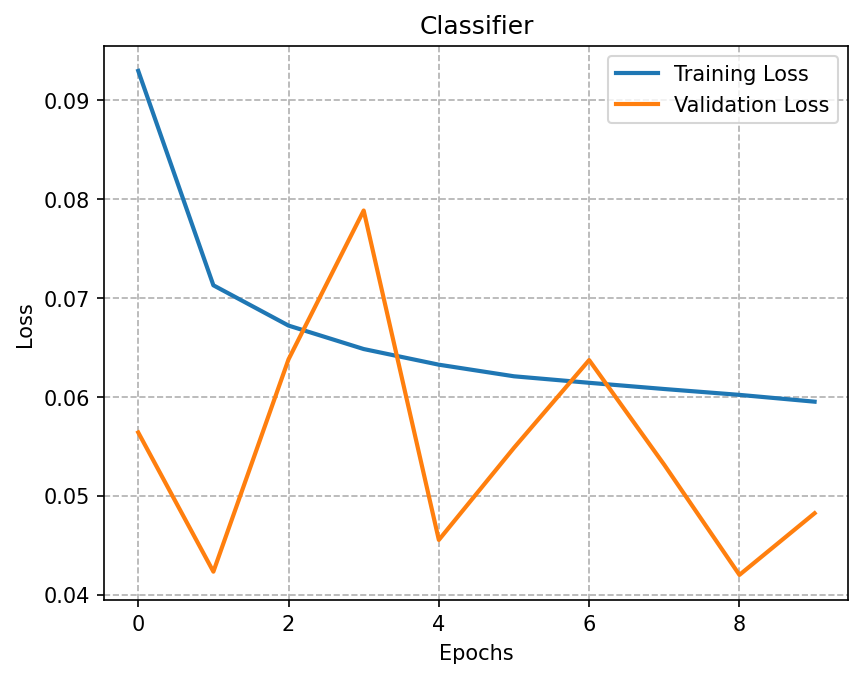

In [ ]:
plt.rcParams['figure.dpi'] = 150
plt.plot(Classifier_History.history['loss'], linewidth=2)
plt.plot(Classifier_History.history['val_loss'], linewidth=2)

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Classifier')
plt.grid(True, linestyle = '--')
plt.show()

In [ ]:
y_Classifier = Classfier.predict(Denoised_model.predict(X_test))
y_pred = np.argmax(y_Classifier, axis=1)

print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred)}')
print(f'Precision = {precision_score(y_test, y_pred)}')
print(f'F1-Score = {f1_score(y_test, y_pred)}')

1336/1336 [==============================] - 2s 2ms/step
Accuracy = 0.9837082465298097
Recall = 0.9090909090909091
Precision = 0.08
F1-Score = 0.14705882352941177


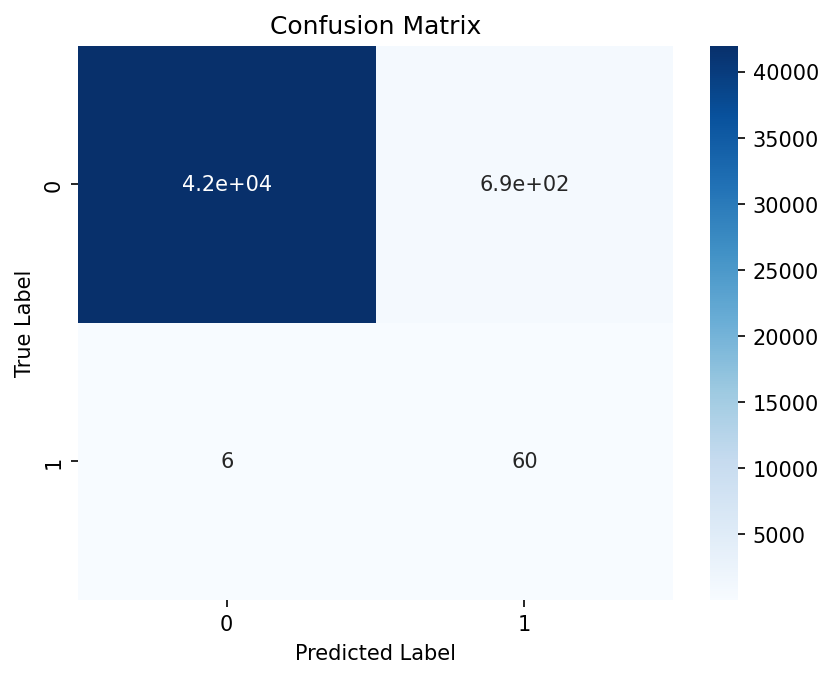

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Oversampling Threshold

In [ ]:
threshold = np.arange(0.05, 1, 0.15)
accuray = []
recall = []

for i in threshold:
  print('\n')
  print('-----------------------------------------------------------------------------------------------')
  print(f'Threshold = {i}')
  sm = SMOTE(sampling_strategy = i, random_state = 6)
  X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
  X_train_noisy = X_train_sm + Noise_factor*np.random.normal(loc=0.0, scale=1.0, size = X_train_sm.shape)

  Denoised_model_CP = ModelCheckpoint('Best_Noisy_Loss.keras', monitor='val_loss', save_best_only=True, mode='min')
  N_History = Denoised_model.fit(X_train_noisy, X_train_sm, validation_data = (X_valid, X_valid), epochs = 10, batch_size = 64, callbacks = [Denoised_model_CP])
  Denoised_model.load_weights('Best_Noisy_Loss.keras')

  X_train_denoised = Denoised_model.predict(X_train_noisy)
  X_valid_denoised = Denoised_model.predict(X_valid)

  Classfier_CP = ModelCheckpoint('best_Classfier_Loss.keras', monitor='val_loss', save_best_only=True, mode='min')

  Classifier_History = Classfier.fit(X_train_denoised, y_train_sm, validation_data = (X_valid_denoised, y_valid), epochs = 10, batch_size = 64, callbacks = [Classfier_CP])
  Classfier.load_weights('best_Classfier_Loss.keras')


  y_prob = Classfier.predict(Denoised_model.predict(X_test))
  y_pred = np.argmax(y_prob, axis=1)

  accuray.append(accuracy_score(y_test, y_pred))
  recall.append(recall_score(y_test, y_pred))



-----------------------------------------------------------------------------------------------
Threshold = 0.05
Epoch 1/10
3266/3266 [==============================] - 11s 3ms/step - loss: 0.2437 - accuracy: 0.6678 - val_loss: 0.1943 - val_accuracy: 0.7408
Epoch 2/10
3266/3266 [==============================] - 9s 3ms/step - loss: 0.2431 - accuracy: 0.6683 - val_loss: 0.1936 - val_accuracy: 0.7375
Epoch 3/10
3266/3266 [==============================] - 11s 3ms/step - loss: 0.2429 - accuracy: 0.6680 - val_loss: 0.1921 - val_accuracy: 0.7365
Epoch 4/10
3266/3266 [==============================] - 10s 3ms/step - loss: 0.2427 - accuracy: 0.6691 - val_loss: 0.2019 - val_accuracy: 0.7123
Epoch 5/10
3266/3266 [==============================] - 11s 3ms/step - loss: 0.2423 - accuracy: 0.6686 - val_loss: 0.1934 - val_accuracy: 0.7355
Epoch 6/10
3266/3266 [==============================] - 11s 3ms/step - loss: 0.2416 - accuracy: 0.6685 - val_loss: 0.1918 - val_accuracy: 0.7392
Epoch 7/10
3266/

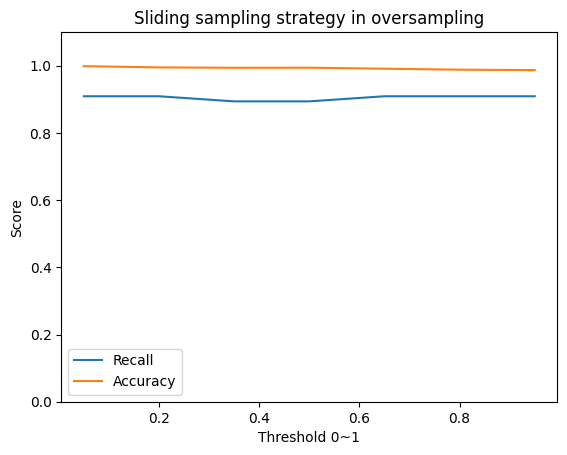

In [ ]:
plt.plot(threshold, recall, label='Recall')
plt.plot(threshold, accuray, label='Accuracy')
plt.ylim(0,1.1)
plt.title('Sliding sampling strategy in oversampling')
plt.xlabel('Threshold 0~1')
plt.ylabel('Score')
plt.legend()

### Without Oversampling

In [ ]:
Classfier_CP_NOS = ModelCheckpoint('best_Classfier_Loss_NO_OS.keras', monitor='val_loss', save_best_only=True, mode='min')

Classifier_History = Classfier.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 10, batch_size = 64, callbacks = [Classfier_CP_NOS])
Classfier.load_weights('best_Classfier_Loss_NO_OS.keras')

Epoch 1/10
3116/3116 [==============================] - 10s 3ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 2/10
3116/3116 [==============================] - 11s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 3/10
3116/3116 [==============================] - 12s 4ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 4/10
3116/3116 [==============================] - 9s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9990
Epoch 5/10
3116/3116 [==============================] - 11s 4ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 6/10
3116/3116 [==============================] - 11s 4ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 7/10
3116/3116 [==============================] - 11s 4ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0036 - val_acc

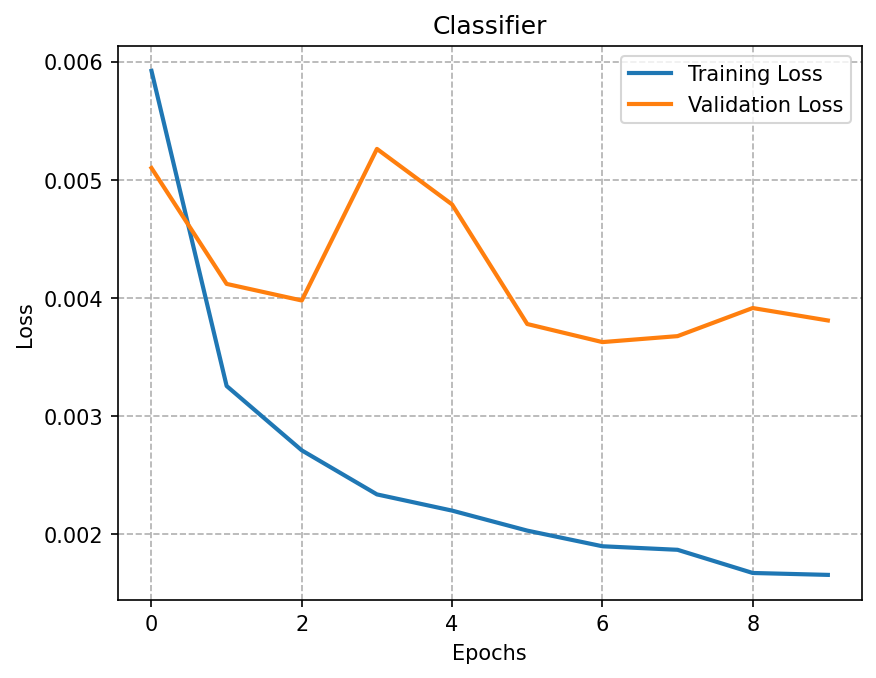

In [ ]:
plt.rcParams['figure.dpi'] = 150
plt.plot(Classifier_History.history['loss'], linewidth=2)
plt.plot(Classifier_History.history['val_loss'], linewidth=2)

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Classifier')
plt.grid(True, linestyle = '--')
plt.show()

In [ ]:
y_prob = Classfier.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred)}')
print(f'Precision = {precision_score(y_test, y_pred)}')
print(f'F1-Score = {f1_score(y_test, y_pred)}')

1336/1336 [==============================] - 3s 2ms/step
Accuracy = 0.9993914000140446
Recall = 0.8636363636363636
Precision = 0.7702702702702703
F1-Score = 0.8142857142857143


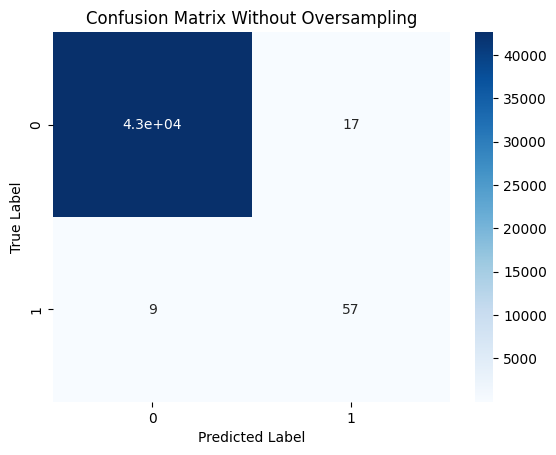

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Without Oversampling")
plt.show()